In [3]:
import os
import glob
import itertools
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn-white')

import matplotlib.cm as cm

import numpy as np

In [4]:
csv = 'csv'
log = 'log'
all_filenames = [i for i in glob.glob('*.{}'.format(csv))]
all_logs = [i for i in glob.glob('*.{}'.format(log))]
print(all_filenames,all_logs)

['combined_csv.csv'] []


In [3]:
# combine all files in the list
# if len(all_filenames) > 1:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [4]:
if len(all_filenames) > 2:
    # Remove logs and other csv's
    for i in all_filenames: 
        if not (i in 'combined_csv.csv'): 
            os.remove(i)
if len(all_logs) > 0:
    for i in all_logs: 
        os.remove(i)


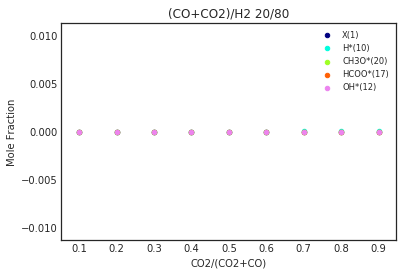

In [5]:
df = pd.read_csv('combined_csv.csv')
df_short_50 = df[(df['X_h2 initial'] >= 0.49) &(df['X_h2 initial'] <= 0.51)]
df_short_75 = df[(df['X_h2 initial'] >= 0.74) &(df['X_h2 initial'] <= 0.76)]
df_short_80 = df[(df['X_h2 initial'] >= 0.79) &(df['X_h2 initial'] <= 0.81)]
df_short_95 = df[(df['X_h2 initial'] >= 0.94) &(df['X_h2 initial'] <= 0.96)]

conditions = ['X(1)', 'H*(10)', 'CH3O*(20)', 'HCOO*(17)', 'OH*(12)']

fig, ax = plt.subplots()
for i in conditions:
    df_short_50.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2 20/80")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')


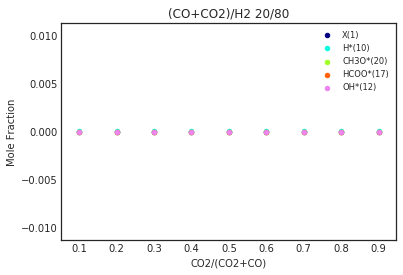

In [6]:
fig, ax = plt.subplots()
for i in conditions:
    df_short_75.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2 20/80")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')

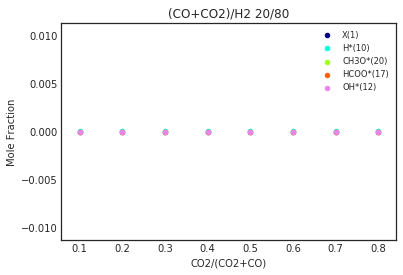

In [7]:
fig, ax = plt.subplots()
for i in conditions:
    df_short_80.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2 20/80")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')

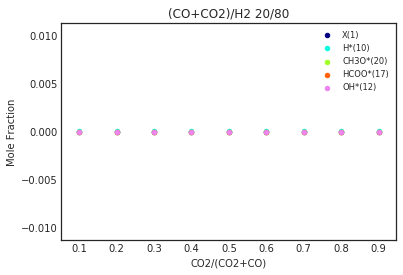

In [8]:
fig, ax = plt.subplots()
for i in conditions:
    df_short_95.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2 20/80")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')

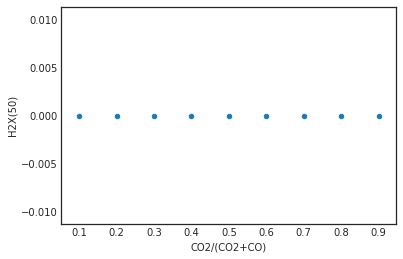

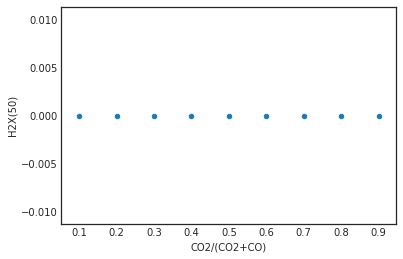

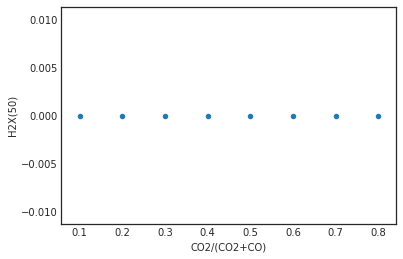

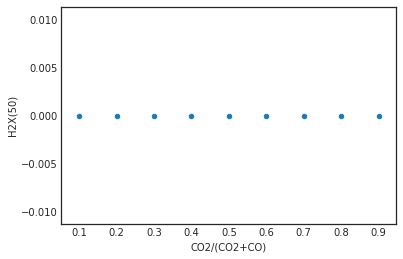

In [9]:
# we are seeing a lot of adsorption at the surface by C2HO,
df_short_50.plot.scatter('CO2/(CO2+CO)', 'H2X(50)')
df_short_75.plot.scatter('CO2/(CO2+CO)', 'H2X(50)')
df_short_80.plot.scatter('CO2/(CO2+CO)', 'H2X(50)')
df_short_95.plot.scatter('CO2/(CO2+CO)', 'H2X(50)')

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

max_dist = 2
imp_reactions = []
imprxn_max = []
imprxn_min = []

df_short = df_short_95

print('\n Reactions with ROP that spikes between 1.5 and 1.8:', '\n')
for i in range (6, len(df_short.columns)):
    
    column = df_short[df_short.columns[i]]
    dist = df_short[df_short.columns[0]]
    max_value = column.max()
    max_index = column.idxmax()
    min_value = column.min()
    min_index = column.idxmin()
    

# 1.5 <= dist[min_index] <= 1.74 and 
    if max_value >= 1e-4 and (("X" in df_short.columns[i]) or ("Pt" in df_short.columns[i]) or ("Pd" in df_short.columns[i]) or ("*" in df_short.columns[i])):
            
        imp_reactions.append(df_short.columns[i])
        imprxn_max.append(max_value)
        imprxn_min.append(min_value)
        print(df_short.columns[i], "Max = " "{:.10f}".format(max_value))
        
    elif min_value <= -1e-4 and (("X" in df_short.columns[i]) or ("Pt" in df_short.columns[i]) or ("Pd" in df_short.columns[i]) or ("*" in df_short.columns[i])):
        
        imp_reactions.append(df_short.columns[i])
        print(df_short.columns[i], "Min = " "{:.10f}".format(min_value))
        imprxn_max.append(max_value)
        imprxn_min.append(min_value)

        


 Reactions with ROP that spikes between 1.5 and 1.8: 

CO*(14) Max = 0.6796006467
HCO*(16) Max = 0.0029028197
CH3OH*(22) Max = 0.9573564623


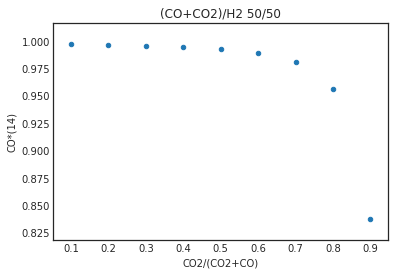

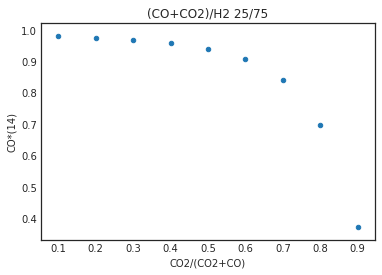

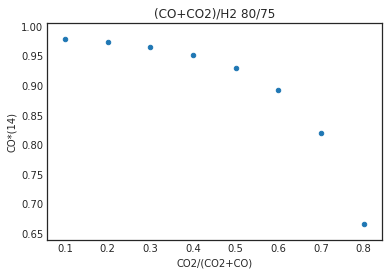

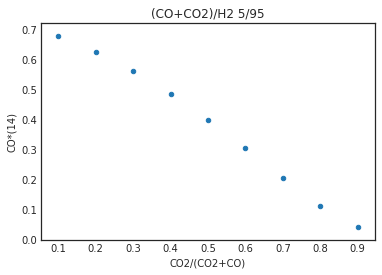

In [11]:
# we are seeing a lot of adsorption at the surface by C2HO,
df_short_50.plot.scatter('CO2/(CO2+CO)', 'CO*(14)',title="(CO+CO2)/H2 50/50")
df_short_75.plot.scatter('CO2/(CO2+CO)', 'CO*(14)',title="(CO+CO2)/H2 25/75")
df_short_80.plot.scatter('CO2/(CO2+CO)', 'CO*(14)',title="(CO+CO2)/H2 80/75")
df_short_95.plot.scatter('CO2/(CO2+CO)', 'CO*(14)',title="(CO+CO2)/H2 5/95")

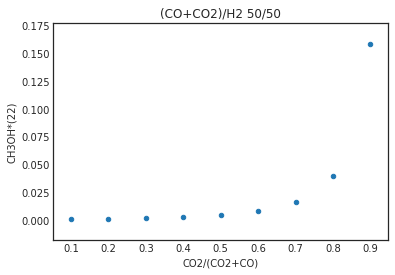

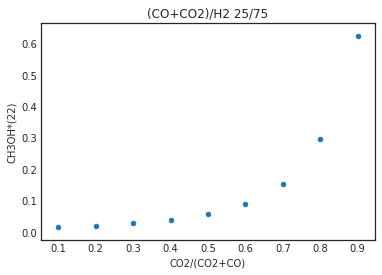

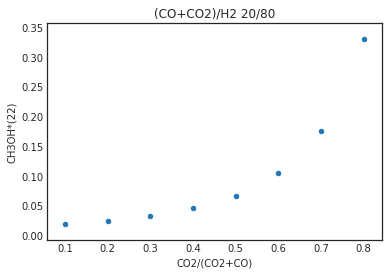

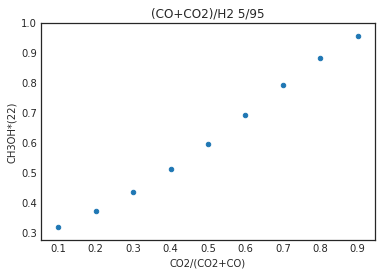

In [12]:
# we are seeing a lot of adsorption at the surface by C2HO,
df_short_50.plot.scatter('CO2/(CO2+CO)', 'CH3OH*(22)',title="(CO+CO2)/H2 50/50")
df_short_75.plot.scatter('CO2/(CO2+CO)', 'CH3OH*(22)',title="(CO+CO2)/H2 25/75")
df_short_80.plot.scatter('CO2/(CO2+CO)', 'CH3OH*(22)',title="(CO+CO2)/H2 20/80")
df_short_95.plot.scatter('CO2/(CO2+CO)', 'CH3OH*(22)',title="(CO+CO2)/H2 5/95")

In [16]:
import math  
import cantera as ct
# Grabow model and RMG input files
# cti_file_rmg = '../base/cantera/chem_annotated.cti'


cti_file_rmg = 'chem_annotated_removed.cti'



#constants
pi = math.pi

# set initial temps, pressures, concentrations
# temp = 230+273.15 # kelvin
temp = 528 # kelvin
pressure = 50*ct.one_atm # Pascals
X_co = 0.1
X_co2= 0.1
X_h2 = 0.8
mw_co = 28.01e-3  # [kg/mol]
mw_co2 = 44.01e-3 # [kg/mol]
mw_h2 = 1.01e-3 # [kg/mol]

# CO/CO2/H2/H2O: typical is 
concentrations_rmg = {'CO(3)': X_co,'CO2(4)': X_co2, 'H2(2)':X_h2}

# initialize cantera gas and surface
gas= ct.Solution(cti_file_rmg,'gas')

# surf_grab = ct.Interface(cti_file,'surface1_grab', [gas_grab])
surf = ct.Interface(cti_file_rmg,'surface1', [gas])

# gas_grab.TPX = 
gas.TPX = temp, pressure, concentrations_rmg
surf.TP = temp, pressure
surf.coverages = 'X(1):1.0'

# create gas inlet
inlet = ct.Reservoir(gas)

#create gas outlet
exhaust = ct.Reservoir(gas)

# Reactor volume
rradius = 35e-3
rlength = 70e-3
rvol = (rradius**2)*pi*rlength

# Catalyst Surface Area
site_density = surf.site_density*1000                #[mol/m^2]cantera uses kmol/m^2, convert to mol/m^2
cat_weight = 4.24e-3                                 #[kg]
cat_site_per_wt = (300*1e-6)*1000                    #[mol/kg] 1e-6mol/micromole, 1000g/kg
cat_area = 10*site_density/(cat_weight*cat_site_per_wt) #[m^3]

# reactor initialization
r = ct.IdealGasReactor(gas, energy='off')
rsurf = ct.ReactorSurface(surf, r, A=cat_area)
r.volume = rvol

# flow controllers (Graaf measured flow at 293.15 and 1 atm)
volume_flow = 0.00424                                               # [m^3/s]
molar_flow = volume_flow*pressure/(8.3145*temp)               # [mol/s]
mass_flow = molar_flow*(X_co*mw_co+X_co2*mw_co2) # [kg/s]
mfc = ct.MassFlowController(inlet, r, mdot=mass_flow)

# initialize reactor network
sim = ct.ReactorNet([r])
# set relative and absolute tolerances on the simulation
sim.rtol = 1.0e-11
sim.atol = 1.0e-22

#for debugging
sim.verbose = True
sim.reinitialize()

print(cat_area)

CanteraError: 
***********************************************************************
CanteraError thrown by findInputFile:

Input file chem_annotated_removed.cti not found in directories 
'/home/blais.ch/.conda/envs/rmg_env_2/lib/python3.7/site-packages/cantera/data', 
'.', 
'/usr/local/share/cantera/data'

To fix this problem, either:
    a) move the missing files into the local directory;
    b) define environment variable CANTERA_DATA to
         point to the directory containing the file.
***********************************************************************
